In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

from evaluation import get_cm_sklearn, print_metrics
from preprocessing import TrainingPreProcessor

RANDOM_STATE = 0

train_set = pd.read_csv("input/train.csv")

training_preprocessor = TrainingPreProcessor()
training_preprocessor.fit(train_set, ignore_columns=["CLIENTNUM"])

X, y = training_preprocessor.transform(train_set)
class_weight = training_preprocessor.class_weight

### Definição e treinamento do modelo regressão logística

In [2]:
svc_model = SVC(random_state=RANDOM_STATE, class_weight=class_weight)

In [3]:
kfold = StratifiedKFold(5, shuffle=True, random_state=RANDOM_STATE)
parameters = {
    "C": np.logspace(-3, 3, 7),
    "kernel": [
        "linear",
        "poly",
        "rbf",
        "sigmoid",
    ],
    "max_iter": [1000, 10000],
    "tol": [1e-3, 1e-4, 1e-5],
}

In [4]:
grid_search = GridSearchCV(
    svc_model,
    parameters,
    scoring="balanced_accuracy",
    cv=kfold,
    verbose=3,
    n_jobs=-1,
)

In [5]:
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.best_estimator_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'C': 1.0, 'kernel': 'rbf', 'max_iter': 10000, 'tol': 0.001}
0.9028567836731707


SVC(class_weight={0: 3.1157692307692306, 1: 0.5955741802676077}, max_iter=10000,
    random_state=0)

In [6]:
best_model = grid_search.best_estimator_

In [7]:
best_model.fit(X, y)

SVC(class_weight={0: 3.1157692307692306, 1: 0.5955741802676077}, max_iter=10000,
    random_state=0)

In [8]:
test_set = pd.read_csv("input/test.csv")
X_test, y_test = training_preprocessor.transform(test_set)

### Avaliação do modelo regressão logística

Accuracy: 0.918558736426456
Balanced Accuracy: 0.916868710322496
F1: 0.9498327759197325
RoC AuC: 0.916868710322496


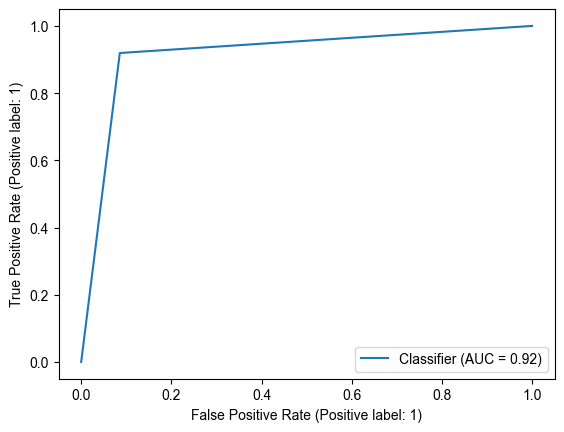

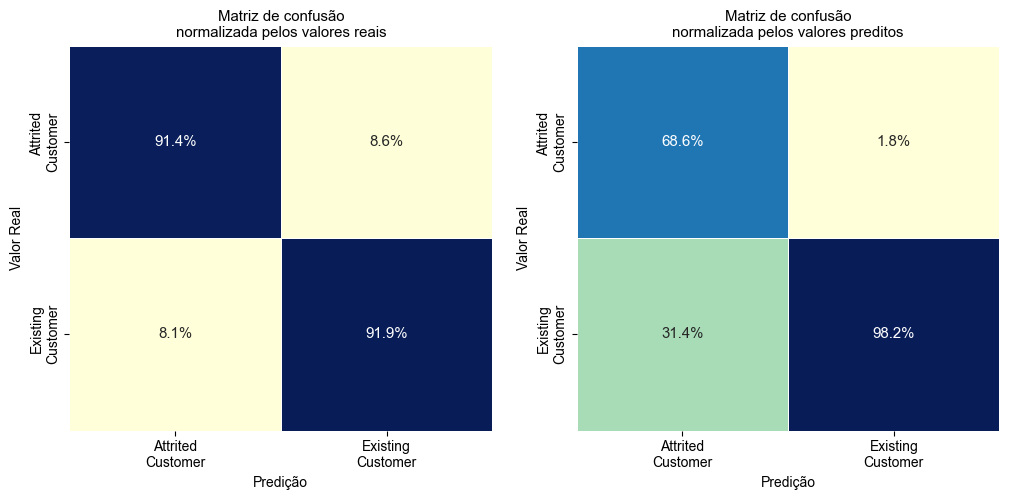

In [9]:
# Avaliação do modelo de Regressão Logística
y_pred_test = best_model.predict(X_test)

print_metrics(y_test, y_pred_test)

get_cm_sklearn(
    y_test,
    y_pred_test,
    labels=[
        "\n".join(label.split())
        for label in training_preprocessor.label_encoder.classes_
    ],
)